# Example with ET-mocks
##### Author: Rodrigo Calderón (calderon@kasi.re.kr)
In this notebook, we use GP to reconstruct the $H(z)$ and $d_L(z)$ from forecasted Einstein Telescope (ET) measurements.

In [1]:
%cd ..

/Users/rodrigocalderon/Documents/github/IFPU-ModIC-workshop


In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['science','high-contrast'])

import dill as pickle
with open('data/H(z)_ET_delta+CE_PEDE_fiducial.pkl','rb') as f:
    data=pickle.load(f)
    
z,median,lwbd=np.array(data[1:4])

In [3]:
def wf_myGP(data,xpred,plot_prediction=True,fit_mean=False,cov_mat=None,optimize=True,plt_kwargs={}):

    from src.gp import MyGP
    x,y,sigma_y=data
    gp=MyGP(fit_mean=fit_mean)
    gp.set_parameter_vector([np.sqrt(np.var(y)),x[0]-x[1]])
    gp.fit(x,sigma_y,cov_mat=cov_mat)
    gp.predict(y,xpred)
    if optimize:
        gp.optimize()
        
    if plot_prediction:
        gp.plot_prediction(xpred,**plt_kwargs)
    print(f'The LML for {gp.get_parameter_vector()} is {gp.LML(gp.get_parameter_vector()):.3f}')
    
    return gp

In [4]:
def Hfid(z,Om0=0.295,H0=70.3):
    fde=lambda z: np.tanh(-np.log(1+z)/np.log(10))+1
    return H0*np.sqrt(Om0*(1+z)**3 + (1-Om0)*fde(z))

def Hlcdm(z,Om0=0.295,H0=70.3):
    return H0*np.sqrt(Om0*(1+z)**3 + (1-Om0))

In [5]:
data=z,median,lwbd-median
xpred=np.linspace(0,3.5)

The LML for [152.72043507   2.42833256] is -49.635


(60.0, 350.0)

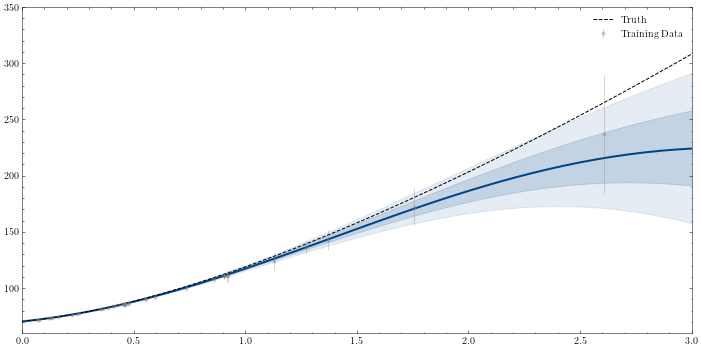

In [6]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
mgp=wf_myGP(data,xpred,plt_kwargs={'truth':Hfid(xpred),'color':'C0','alpha':0.3,'legend':True})
# plt.plot(xpred,,ls='--',c='k')
plt.xlim(0,3.)
plt.ylim(60,350)

In [7]:
import dill as pickle
with open('data/dL(z)_ET_delta+CE_PEDE_fiducial.pkl','rb') as f:
    data=pickle.load(f)
    
z,median,lwbd=np.array(data[1:4])

In [8]:
from scipy.integrate import quad

def dL(z,H):
    integrand=lambda z: 299792458e-3/H(z)
    return (1+z)*np.array([quad(integrand,0,zi)[0] for zi in z])

In [10]:
data=z,median,lwbd-median
xpred=np.linspace(0,3.5)

The LML for [4.44793306e+03 1.50622321e+00] is -237.855


(0.0, 3.0)

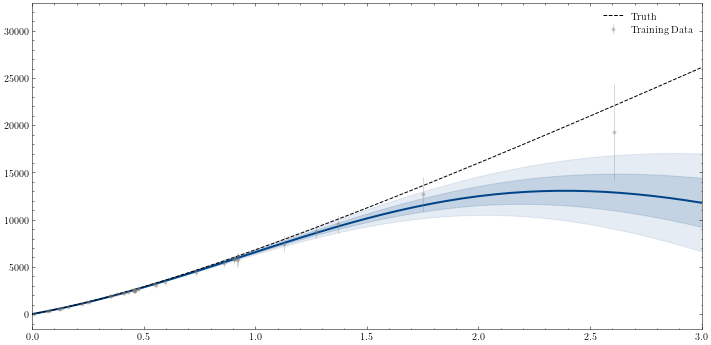

In [14]:

fig,ax=plt.subplots(1,1,figsize=(12,6))
gp=wf_myGP(data,xpred,plt_kwargs={'truth':dL(xpred,Hfid),'color':'C0','alpha':0.3,'legend':True})
# plt.plot(xpred,dL(xpred,Hfid)-dL(xpred,Hlcdm),ls='--',c='k')
# plt.loglog()
plt.xlim(0,3.)
# plt.ylim(-1e-1,1e-1)